In [1]:
import os
import pandas as pd
import numpy as np
from IPython.display import Image, HTML, display

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

dict_classes = {'c0': 'safe driving',
            'c1': 'texting - right',
            'c2': 'talking on the phone - right',
            'c3': 'texting - left',
            'c4': 'talking on the phone - left',
            'c5': 'operating the radio',
            'c6': 'drinking',
            'c7': 'reaching behind',
            'c8': 'hair and makeup',
            'c9': 'talking to passenger'}

# Reading data

In [2]:
submission = pd.read_csv(os.path.join('..', 'data', 'sample_submission.csv'), index_col='img')
driver_imgs_list = pd.read_csv(os.path.join('..', 'data', 'driver_imgs_list.csv'), index_col='img')

print('Sample submission dataset (test images)')
print(submission.shape)
print(submission.head())


print()
print('Train dataset')
print(driver_imgs_list.shape)
print(driver_imgs_list.head())

Sample submission dataset (test images)
(79726, 10)
                 c0   c1   c2   c3   c4   c5   c6   c7   c8   c9
img                                                             
img_1.jpg       0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
img_10.jpg      0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
img_100.jpg     0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
img_1000.jpg    0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
img_100000.jpg  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1

Train dataset
(22424, 2)
              subject classname
img                            
img_44733.jpg    p002        c0
img_72999.jpg    p002        c0
img_25094.jpg    p002        c0
img_69092.jpg    p002        c0
img_92629.jpg    p002        c0


# Check that all files are present

In [13]:
import os.path

files_not_found = [i for (i, c) in driver_imgs_list['classname'].iteritems() if not os.path.isfile(os.path.join('..', 'data', 'train', c, i))]
print('There are {}/{} images not found in the train folder.'.format(len(files_not_found), driver_imgs_list.shape[0]))

files_not_found = [i for i in submission.index if not os.path.isfile(os.path.join('..', 'data', 'test', i))]
print('There are {}/{} images not found in the test folder.'.format(len(files_not_found), submission.shape[0]))

There are 0/22424 images not found in the train folder.
There are 0/79726 images not found in the test folder.


# Distributions

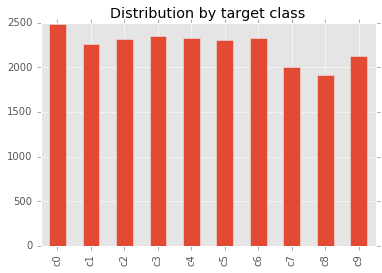

In [17]:
driver_imgs_list['classname'].value_counts().sort_index().plot(kind='bar', title='Distribution by target class')

Classes are well-balanced.

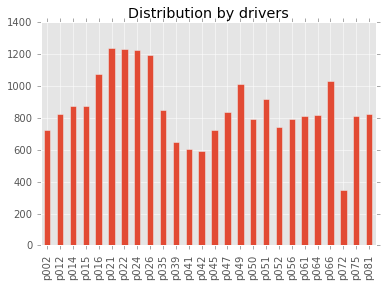

In [23]:
driver_imgs_list['subject'].value_counts().sort_index().plot(kind='bar', title='Distribution by drivers')

2DO list:
    - should P072 driver be excluded from training set?
    - undersampling: training set of ~10/~100 random images stratified by driver*class

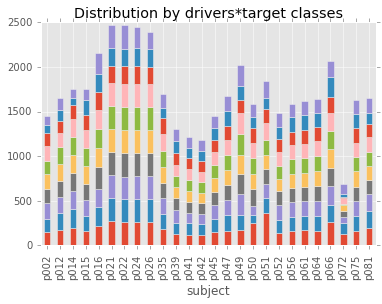

In [4]:
driver_imgs_list.pivot_table(index='subject', columns='classname', aggfunc=np.size).sort_index().plot(kind='bar', title='Distribution by drivers*target classes', stacked=True, legend=False)

Classes are well-balanced per driver.

# Visually checking images

In [18]:
for i in range(10):
    i_class = 'c' + str(i)
    i_driver = driver_imgs_list['subject'].sample(1)[0]
    sample = [os.path.join('..', 'data', 'train', i_class, s) for s in driver_imgs_list[(driver_imgs_list['subject']==i_driver) & (driver_imgs_list['classname']==i_class)].sample(5).index.tolist()]
    imagesList=''.join( ["<img style='width: 180px; margin: 0px; float: left; border: 1px solid black;' src='%s' />" % s
                          for s in sample
                         ])
    print('Class {} : {}, random driver {}'.format(i_class, dict_classes[i_class], i_driver))
    display(HTML(imagesList))

Class c0 : safe driving, random driver p050


Class c1 : texting - right, random driver p075


Class c2 : talking on the phone - right, random driver p075


Class c3 : texting - left, random driver p024


Class c4 : talking on the phone - left, random driver p022


Class c5 : operating the radio, random driver p012


Class c6 : drinking, random driver p072


Class c7 : reaching behind, random driver p035


Class c8 : hair and makeup, random driver p042


Class c9 : talking to passenger, random driver p042


# Checking image resolution

In [21]:
from PIL import Image

images = pd.DataFrame(columns = ['size'])

# very slow, consider refactoring pls
for (i, c) in driver_imgs_list['classname'].iteritems():
    images.loc[i, 'size'] = Image.open('/'.join(['data/train', c, i])).size

for i in submission.index:
    images.loc[i, 'size'] = Image.open('data/test/' + i).size

print(images['size'].value_counts())

(640, 480)    102150
Name: size, dtype: int64


All images are RGB .jpg with 640*480 resolution. Consider resizing images to ~100x100 and converting to grayscale.